Question: http://ais.informatik.uni-freiburg.de/teaching/ss17/robotics/exercises/python/sheet03.pdf  
Solution: http://ais.informatik.uni-freiburg.de/teaching/ss17/robotics/exercises/solutions/03/sheet03sol.pdf  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def diffDrive(x, y, theta, vl, vr, t, l):
    # straight motion
    if vl == vr:
        theta_ret = theta
        v = (vl + vr) / 2
        x_ret = x + v * t * np.cos(theta)
        y_ret = y + v * t * np.sin(theta)
    # circular motion
    else:
        # Calculate the radius
        R = l / 2 * (vr + vl) / (vr - vl)
        omega = (vr - vl) / l
        # computing center of curvature
        # pay attention to the orientation of the robot (x -> north, y -> west, z -> upper)
        ICC_x = x - R * np.sin(theta)
        ICC_y = y + R * np.cos(theta)
        # compute the angular velocity
        dtheta = omega * t
        # forward kinematics for differential drive
        x_ret = np.cos(dtheta) * (x - ICC_x) - np.sin(dtheta) * (y - ICC_y) + ICC_x
        y_ret = np.sin(dtheta) * (x - ICC_x) + np.cos(dtheta) * (y - ICC_y) + ICC_y
        theta_ret = dtheta + theta
    return x_ret, y_ret, theta_ret

In [5]:
x, y, theta = 1.5, 2.0, (np.pi)/2.0
l = 0.5
command1_t, command1_vl, command1_vr = 3, 0.3, 0.3
ret1_x, ret1_y, ret1_theta = diffDrive(x, y, theta, command1_vl, command1_vr, command1_t, l)
command2_t, command2_vl, command2_vr = 1, 0.1, -0.1
ret2_x, ret2_y, ret2_theta = diffDrive(ret1_x, ret1_y, ret1_theta, command2_vl, command2_vr, command2_t, l)
command3_t, command3_vl, command3_vr = 2, 0.2, 0
ret3_x, ret3_y, ret3_theta = diffDrive(ret2_x, ret2_y, ret2_theta, command3_vl, command3_vr, command3_t, l)
print(ret1_x, ret1_y, ret1_theta)
print(ret2_x, ret2_y, ret2_theta)
print(ret3_x, ret3_y, ret3_theta)

1.5 2.9 1.5707963267948966
1.5 2.9 1.1707963267948966
1.6396758098815527 3.035655185914644 0.3707963267948966


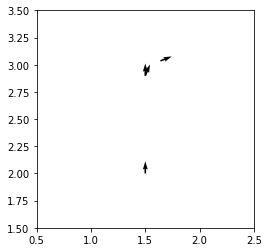

In [10]:
plt.gca().set_aspect('equal')
plt.quiver(x, y, np.cos(theta), np.sin(theta))
plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])
plt.quiver(ret1_x, ret1_y, np.cos(ret1_theta), np.sin(ret1_theta))
plt.quiver(ret2_x, ret2_y, np.cos(ret2_theta), np.sin(ret2_theta))
plt.quiver(ret3_x, ret3_y, np.cos(ret3_theta), np.sin(ret3_theta))

In [11]:
plt.savefig("lecture3_ctrl.png")
plt.show()

<Figure size 432x288 with 0 Axes>